## Slicing
- loc -> based on name
- iloc -> based upon index
- head
- tail

In [ ]:
import pandas as pd
tips_df = pd.read_csv('./tips.csv')
tips_df.iloc[3:5]

,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips_df.loc[3:5]


,total_bill,tip,sex,smoker,day,time,size
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [ ]:
tips_df.tail(6).loc[1] # this errors out because it is not looking for an index but rather a value the equals to 1

KeyError: 1

In [ ]:
tips_df.tail(6).iloc[2:4]
# or you can use tips_df.tail(6).loc[240:241]
# or you can use negative indexes

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.0,Female,Yes,Sat,Dinner,2
241,22.67,2.0,Male,Yes,Sat,Dinner,2


In [ ]:
tips_df.tail(6).loc[240:241, ['tip', 'size']]
# there is also a long way of doing it as well

,tip,size
240,2.0,2
241,2.0,2


In [18]:
tips_df.tail(6).loc[240:241, "tip"]  # A column
tips_df.tail(6).loc[240:241, ["tip", "size"]]  # Multiple columns
tips_df.tail(6).loc[240:241, "tip":"size"]  # Range of columns


,tip,sex,smoker,day,time,size
240,2.0,Female,Yes,Sat,Dinner,2
241,2.0,Male,Yes,Sat,Dinner,2


In [ ]:
tips_df.tail(6).iloc[2:4, 1:7] # columns from 1 to 6
tips_df.tail(6).iloc[2:4, [1,6]] # columns 1 and 6


,tip,size
240,2.0,2
241,2.0,2


In [26]:
# all rows but only columns from tip to day
tips_df.loc[:,'tip':'day']
tips_df.iloc[:, 1:5]
tips_df[["tip", "sex", "smoker", "day"]]

,tip,sex,smoker,day
0,1.01,Female,No,Sun
1,1.66,Male,No,Sun
2,3.50,Male,No,Sun
3,3.31,Male,No,Sun
4,3.61,Female,No,Sun
...,...,...,...,...
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat
242,1.75,Male,No,Sat


In [ ]:
tips_df["tip_percent"] = round((tips_df["tip"] / tips_df["total_bill"]) * 100, 2)
tips_df.sort_values(by="tip_percent", ascending=False).iloc[5:]


tip_high = tips_df.sort_values(by="tip_percent", ascending=False)
weekends_rank = tip_high[(tip_high["day"] == "Sun") | (tip_high["day"] == "Sat")].loc[5:]
weekends_rank

# we can simply this by using the isin() function
tip_high = tips_df.sort_values(by="tip_percent", ascending=False)
weekends_rank = tip_high[tip_high["day"].isin(['Sun', 'Sat', 'Fri'])] # readable and extendable
weekends_rank


,total_bill,tip,sex,smoker,day,time,size,tip_percent
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
212,48.33,9.00,Male,No,Sat,Dinner,4,18.62
218,7.74,1.44,Male,Yes,Sat,Dinner,2,18.60
47,32.40,6.00,Male,No,Sun,Dinner,4,18.52
44,30.40,5.60,Male,No,Sun,Dinner,4,18.42
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,6.57
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
57,26.41,1.50,Female,No,Sat,Dinner,2,5.68
102,44.30,2.50,Female,Yes,Sat,Dinner,3,5.64


In [40]:
tips_df[
    (tips_df["day"] == "Thur") & (tips_df["size"] > 3) & (tips_df["time"] == 'Lunch')
].sort_values(by="tip", ascending=False).iloc[2:4]

,total_bill,tip,sex,smoker,day,time,size,tip_percent
197,43.11,5.0,Female,Yes,Thur,Lunch,4,11.60
143,27.05,5.0,Female,No,Thur,Lunch,6,18.48


## Statistical
- mean
- median
- sum
- mode

In [41]:
tips_df.describe()

,total_bill,tip,size,tip_percent
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.079754
std,8.902412,1.383638,0.951100,6.107020
min,3.070000,1.000000,1.000000,3.560000
25%,13.347500,2.000000,2.000000,12.910000
50%,17.795000,2.900000,2.000000,15.475000
75%,24.127500,3.562500,3.000000,19.147500
max,50.810000,10.000000,6.000000,71.030000


In [43]:
tips_df['tip'].mean()

np.float64(2.99827868852459)

In [ ]:
tips_df[["tip", "size"]].median() # for two columns

tip     2.9
size    2.0
dtype: float64

In [47]:
print(tips_df[['total_bill', 'tip']].mean())
print(tips_df[["total_bill", "tip"]].mode())
print(tips_df[["total_bill", "tip"]].sum())
print(tips_df[["total_bill", "tip"]].median())

total_bill    19.785943
tip            2.998279
dtype: float64
   total_bill  tip
0       13.42  2.0
total_bill    4827.77
tip            731.58
dtype: float64
total_bill    17.795
tip            2.900
dtype: float64


In [ ]:
sun_df = tips_df[tips_df['day'] == 'Sun']
sun_df['tip'].mean() # combination with filter

np.float64(3.2551315789473687)

## Summarizing

# Task 1
- Average total_bill on each day (tips_df)
 
 ```sql
select avg(total_bill) from tips_df group by 'day'
 ```

In [50]:
tips_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [ ]:
# Task 2.1
# Who leaves more tip Smoker vs Non-Smoker by Total

tips_df.groupby('smoker')['tip'].sum()


smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

In [ ]:
# Task 2.2
# Who leaves more tip Smoker vs Non-Smoker on an average

tips_df.groupby("smoker")["tip"].mean()


smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

### Agragate function

In [60]:
tips_df.groupby("smoker").aggregate({"tip": ["mean", "sum"], "total_bill": ["mean", "sum"]})

tip         total_bill         
            mean     sum       mean      sum
smoker                                      
No      2.991854  451.77  19.188278  2897.43
Yes     3.008710  279.81  20.756344  1930.34

# Task 3
Based on the day calculate total of total_bill and on average what is tip_percent

 

In [61]:
tips_df.groupby("day").aggregate({"total_bill": 'sum', 'tip_percent': 'mean' })

,total_bill,tip_percent
day,,
Fri,325.88,16.991579
Sat,1778.40,15.314598
Sun,1627.16,16.689605
Thur,1096.33,16.126452


### One more level drilling down
### Task
- On average who leaves more tip by each day

In [ ]:
tips_df.groupby(['smoker', 'day']).aggregate({"total_bill": "sum", "tip_percent": "mean"})


total_bill  tip_percent
smoker day                          
No     Fri        73.68    15.165000
       Sat       884.78    15.804222
       Sun      1168.88    16.011228
       Thur      770.09    16.028667
Yes    Fri       252.20    17.478667
       Sat       893.62    14.790000
       Sun       458.28    18.724737
       Thur      326.24    16.385294

In [ ]:
tips_df.groupby(["sex", "day"]).aggregate(
    {
        "tip": [
            "max",
            "min",
            "mean",
        ],
    }
).unstack()


tip                                                             \
         max                   min                       mean             
day      Fri   Sat  Sun  Thur  Fri  Sat   Sun  Thur       Fri       Sat   
sex                                                                       
Female  4.30   6.5  5.2  5.17  1.0  1.0  1.01  1.25  2.781111  2.801786   
Male    4.73  10.0  6.5  6.70  1.5  1.0  1.32  1.44  2.693000  3.083898   

                            
                            
day          Sun      Thur  
sex                         
Female  3.367222  2.575625  
Male    3.220345  2.980333

## visualize
- Matplot
  - Pioneer
  - Beginner-Friendly
- Seaborn
  - It uses internally matplot
  - complex visualization easily 

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Bar Graph

Text(0.5, 1.0, 'Tips on the first 5 days')

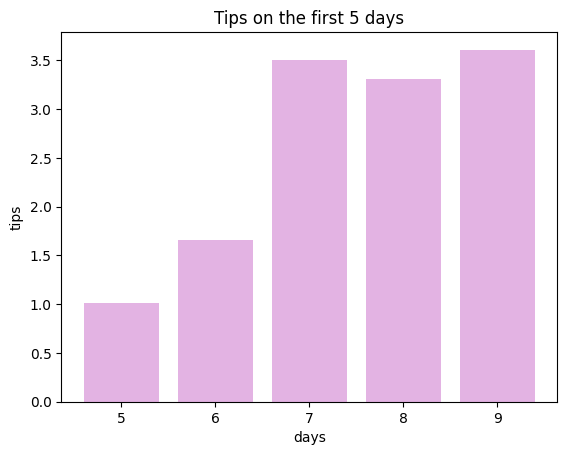

In [90]:
y_axis = tips_df['tip'].head()
# x_axis = y_axis.index + 1
x_axis = np.arange(5,10)
plt.bar(x_axis, y_axis, color="plum", alpha =0.8)
plt.xlabel('days')
plt.ylabel('tips')
plt.title('Tips on the first 5 days')


## takes
Draw a bar graph for Average total bill for each day

<BarContainer object of 4 artists>

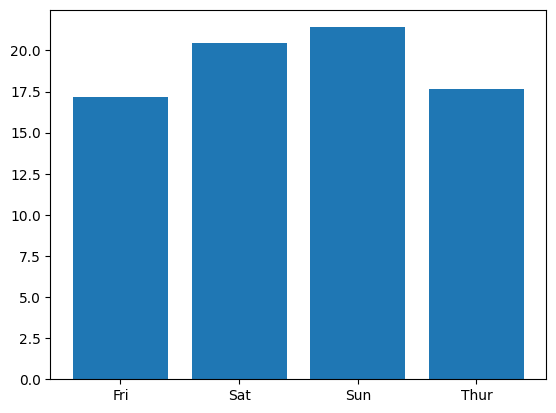

In [101]:
y_axis = tips_df.groupby('day')['total_bill'].mean()
x_axis = y_axis.index
plt.bar(x_axis, y_axis)

<Axes: title={'center': 'Average sales in a week'}, xlabel='days', ylabel='Average'>

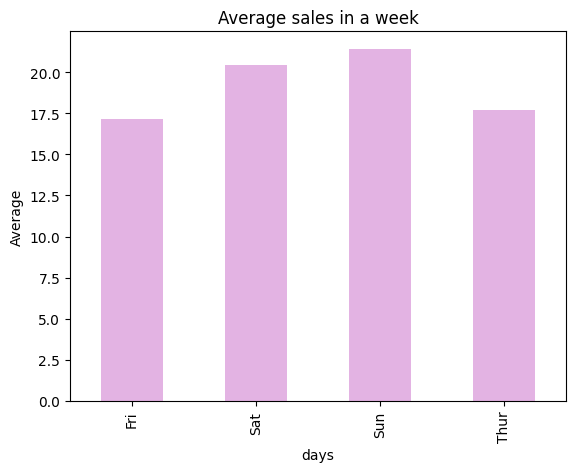

In [102]:
y_axis = tips_df.groupby("day")["total_bill"].mean()
y_axis.plot(kind='bar', xlabel='days' ,ylabel='Average', title='Average sales in a week', color ='plum', alpha=0.8)

Each column is called a series
Whenever I have a seris we can use the plot Functional

<Axes: title={'center': 'Average sales in a week'}, ylabel='total_bill'>

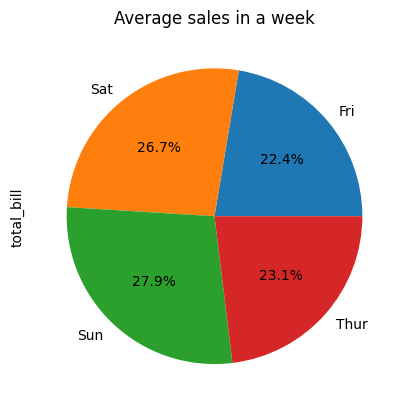

In [108]:
y_axis = tips_df.groupby("day")["total_bill"].mean()
y_axis.plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Average sales in a week",

)


<Axes: title={'center': 'Proportion of Meals'}, ylabel='size'>

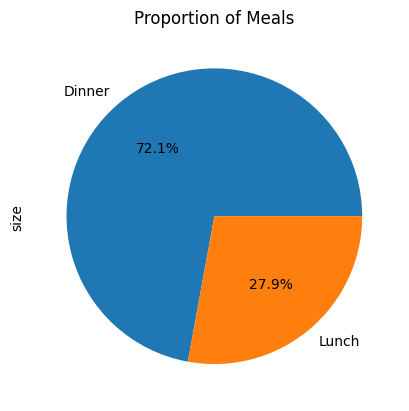

In [118]:
series1 = tips_df.groupby('time')['size'].count()
series1.plot(
    kind="pie",
    title="Proportion of Meals",
    autopct="%1.1f%%",
)

## Scatter



Text(0, 0.5, 'Tip percent')

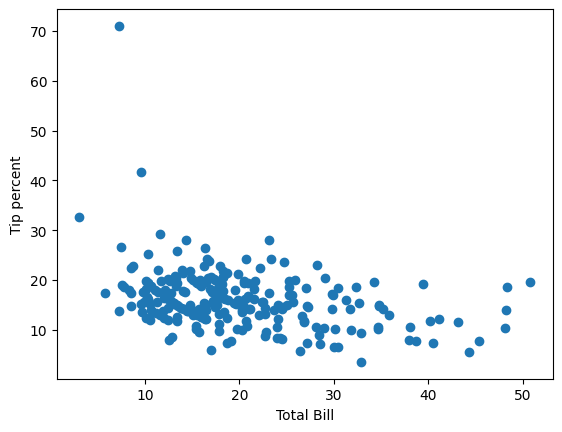

In [121]:
plt.scatter(tips_df['total_bill'], tips_df['tip_percent'] )
plt.xlabel('Total Bill')
plt.ylabel("Tip percent")


Text(0, 0.5, 'Frequency')

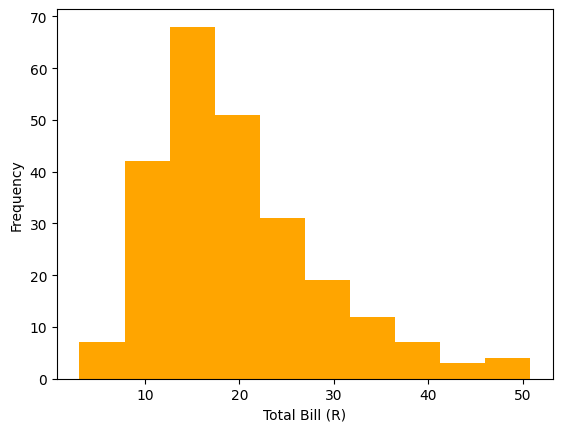

In [ ]:
plt.hist(tips_df['total_bill'], color='orange', bins = 15)
plt.xlabel('Total Bill (R)')
plt.ylabel('Frequency')